In [1]:
import numpy as np
import scipy.stats
import msprime
import pandas as pd
import allel
import multiprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [9]:
# these files have:
#    diploid_size = [100]
#    seq_len = [1e8]


div_file = "../data/1003185938_site_diversity.csv"
het_file = "../data/1003185938_heterozygosity.csv"

In [5]:
pd.read_csv(div_file)

,experiment,exp_seed,pop_ind,pop_sites,pop_seed,obs_ind,obs_sites,num_observation,seq_len,rec_rate,...,jk_one_sites_above,jk_mj_sites_lower,jk_mj_sites_within,jk_mj_sites_above,bt_ind_lower,bt_ind_within,bt_ind_above,jk_ind_lower,jk_ind_within,jk_ind_above
0,0,1,100,2434,1791095845,50,40,10,100000000.0,1.000000e-08,...,0,1,9,0,4,3,3,4,3,3
1,0,1,100,2434,1791095845,50,154,10,100000000.0,1.000000e-08,...,2,0,8,2,3,2,5,3,2,5
2,0,1,100,2434,1791095845,50,600,10,100000000.0,1.000000e-08,...,0,0,10,0,1,8,1,1,8,1
3,0,1,100,2434,1791095845,50,2323,10,100000000.0,1.000000e-08,...,0,0,10,0,0,10,0,0,10,0
4,0,1,100,2434,1791095845,50,2434,10,100000000.0,1.000000e-08,...,0,0,10,0,0,10,0,0,10,0
5,1,1,100,2460,4282876139,50,40,10,100000000.0,1.000000e-08,...,0,0,10,0,5,3,2,5,3,2
6,1,1,100,2460,4282876139,50,154,10,100000000.0,1.000000e-08,...,0,0,10,0,3,3,4,3,3,4
7,1,1,100,2460,4282876139,50,600,10,100000000.0,1.000000e-08,...,0,0,10,0,3,6,1,3,6,1
8,1,1,100,2460,4282876139,50,2323,10,100000000.0,1.000000e-08,...,0,0,10,0,0,9,1,0,9,1
9,1,1,100,2460,4282876139,50,2460,10,100000000.0,1.000000e-08,...,0,0,10,0,0,10,0,0,10,0


In [7]:
div_df = pd.read_csv(div_file)
div_df.groupby('obs_sites').sum().iloc[:,11:]

,bt_sites_lower,bt_sites_within,bt_sites_above,jk_one_sites_lower,jk_one_sites_within,jk_one_sites_above,jk_mj_sites_lower,jk_mj_sites_within,jk_mj_sites_above,bt_ind_lower,bt_ind_within,bt_ind_above,jk_ind_lower,jk_ind_within,jk_ind_above
obs_sites,,,,,,,,,,,,,,,
40,3,44,3,3,45,2,2,46,2,21,14,15,21,14,15
154,0,48,2,0,48,2,0,48,2,21,12,17,21,12,17
600,0,50,0,0,50,0,0,50,0,13,26,11,13,26,11


In [10]:
het_df = pd.read_csv(het_file)
het_df.groupby('obs_sites').sum().iloc[:,11:]

,bt_sites_lower,bt_sites_within,bt_sites_above,jk_one_sites_lower,jk_one_sites_within,jk_one_sites_above,jk_mj_sites_lower,jk_mj_sites_within,jk_mj_sites_above,bt_ind_lower,bt_ind_within,bt_ind_above,jk_ind_lower,jk_ind_within,jk_ind_above
obs_sites,,,,,,,,,,,,,,,
40,3,46,1,3,46,1,1,48,1,17,23,10,17,23,10
154,0,47,3,0,48,2,0,48,2,12,26,12,12,25,13
600,2,48,0,2,48,0,0,49,1,7,38,5,7,39,4
2177,0,20,0,0,20,0,0,20,0,1,19,0,1,19,0
2323,2,38,0,2,38,0,0,40,0,2,38,0,2,38,0
2421,0,10,0,0,10,0,0,10,0,0,10,0,0,10,0
2434,1,9,0,1,9,0,0,10,0,0,10,0,0,10,0
2460,0,10,0,0,10,0,0,10,0,0,10,0,0,10,0
2482,0,10,0,0,10,0,0,10,0,0,10,0,0,10,0


In [11]:
res_columns = [x for x in het_df.columns.tolist() if x.endswith('within')]
res_columns

['bt_sites_within',
 'jk_one_sites_within',
 'jk_mj_sites_within',
 'bt_ind_within',
 'jk_ind_within']

Text(0.5, 1.0, 'Heterozygosity')

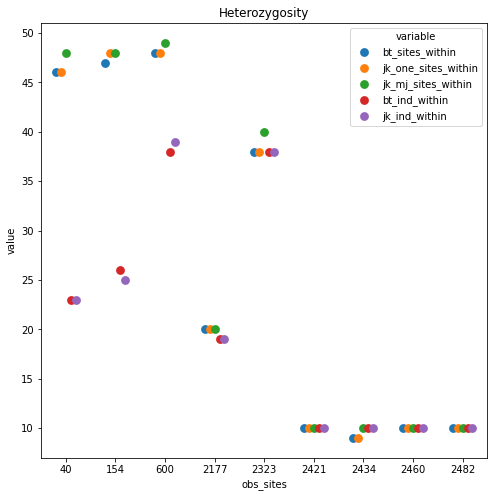

In [13]:
temp = het_df.groupby('obs_sites').sum()[res_columns]
temp = temp.reset_index()
temp = temp.melt(id_vars = ['obs_sites'])
plt.subplots(figsize = (8,8))
sns.pointplot(x="obs_sites", y="value", hue="variable",
              data=temp, dodge=.4,
              join=False, )
#plt.axhline(y=95*5)
plt.title('Heterozygosity')

Text(0.5, 1.0, 'Diversity')

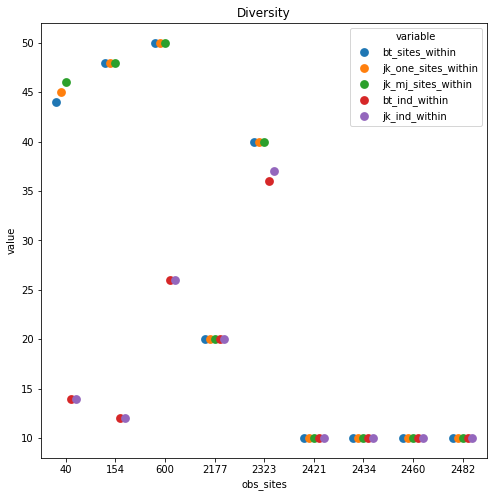

In [14]:
temp = div_df.groupby('obs_sites').sum()[res_columns]
temp = temp.reset_index()
temp = temp.melt(id_vars = ['obs_sites'])
plt.subplots(figsize = (8,8))
sns.pointplot(x="obs_sites", y="value", hue="variable",
              data=temp, dodge=.4,
              join=False, )
#plt.axhline(y=95*5)
plt.title('Diversity')

Text(0.5, 1.0, 'Fst')

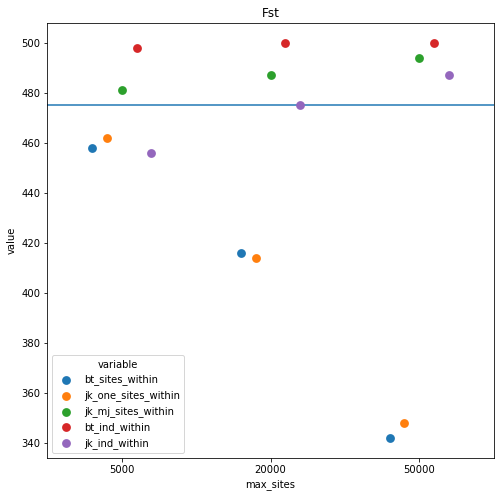

In [9]:
temp = fst_df.groupby('obs_sites').sum()[res_columns]
temp = temp.reset_index()
temp = temp.melt(id_vars = ['obs_sites'])
plt.subplots(figsize = (8,8))
sns.pointplot(x="obs_sites", y="value", hue="variable",
              data=temp, dodge=.4,
              join=False, )
#plt.axhline(y=95*5)
plt.title('Fst')

pop: 0.04870
obs: 0.04566
obs: 0.04467
obs: 0.04636
obs: 0.04480
obs: 0.05448
obs: 0.04443
obs: 0.04595
obs: 0.05164
obs: 0.04907
obs: 0.05645
obs: 0.04658
obs: 0.04315
obs: 0.04268
obs: 0.05121
obs: 0.06503
obs: 0.04622
obs: 0.04777
obs: 0.05137
obs: 0.05148
obs: 0.04752
obs: 0.05158
obs: 0.04535
obs: 0.04588
obs: 0.04466
obs: 0.04026
obs: 0.04612
obs: 0.04583
obs: 0.04002
obs: 0.05112
obs: 0.04883
obs: 0.05201
obs: 0.05271
obs: 0.04392
obs: 0.04193
obs: 0.04345
obs: 0.06130
obs: 0.04497
obs: 0.05521
obs: 0.05406
obs: 0.04384


Text(0.5, 0.98, 'max sites: 500')

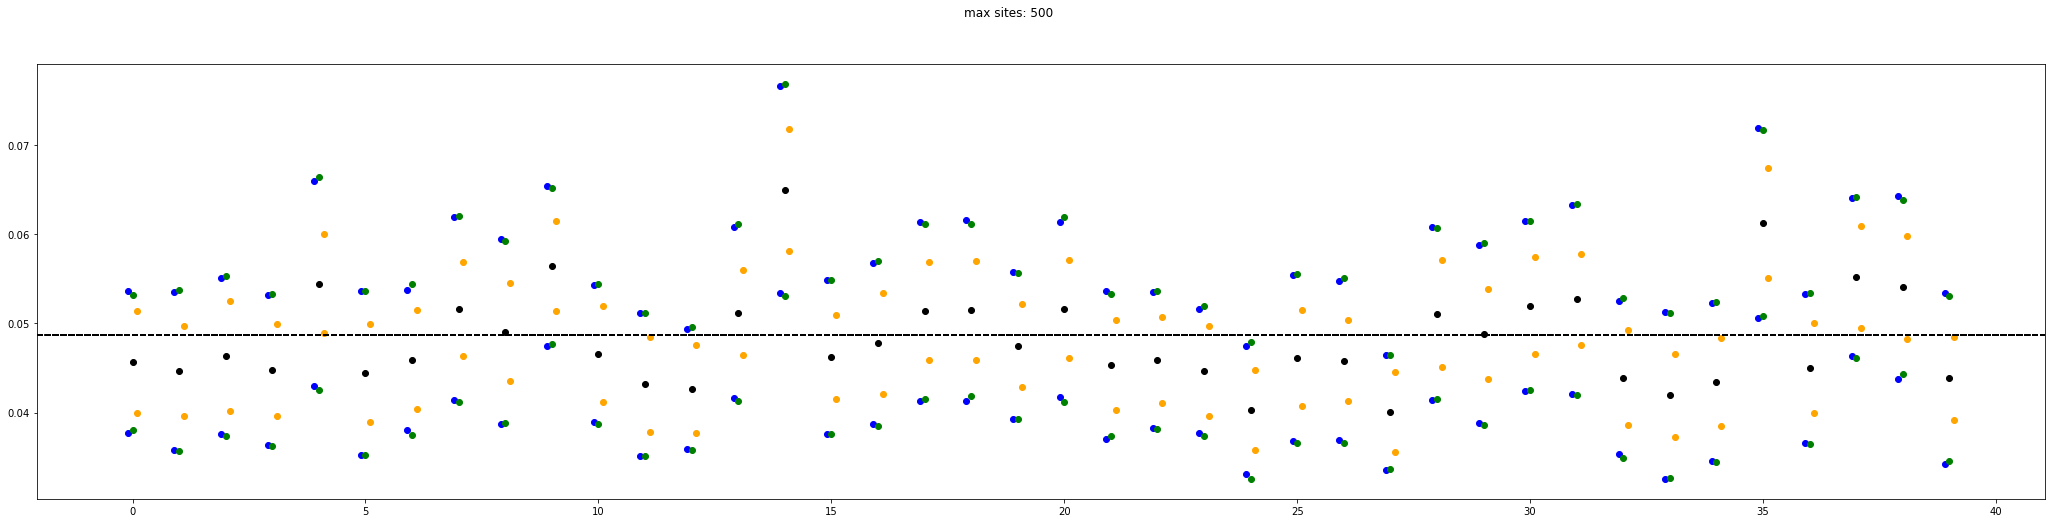

In [32]:
nrep = 40
ci_interval = 0.95
max_sites = 500

pop_fst = get_fst_general(pop_ts, np.arange(pop_ts.num_sites), pop_ts.samples(0), pop_ts.samples(1))
print(f"pop: {pop_fst:0.5f}")

fig, ax = plt.subplots(figsize=(36,8))
for x in range(nrep):
    obs_ts = observe(ts=pop_ts, num_inds=50, max_sites=max_sites, num_pop=2)
    obs_fst = get_fst_general(obs_ts, np.arange(obs_ts.num_sites), obs_ts.samples(0), obs_ts.samples(1))
    print(f"obs: {obs_fst:0.5f}")
    # resample sites
    bt_site_vals = bootstrap_sites_fst(obs_ts)
    jk_site_vals = jackknife_sites_fst(obs_ts)
    # resamples inds
    jk_ind_vals = jackknife_inds_fst(obs_ts)
    
    # calculate cis
    bt_site_ci = bt_standard(bt_site_vals, ci_interval, obs_fst)
    jk_site_ci = jk_delete_one(jk_site_vals, ci_interval, obs_fst)
    jk_ind_ci = jk_delete_one(jk_ind_vals, ci_interval, obs_fst)
    
    ax.axhline(y=pop_fst, c = 'black', ls = '--')
    ax.scatter(x, obs_fst, c = 'black')
    ax.scatter([x-.1]*2, bt_site_ci, c='blue', label = 'bt_site')
    ax.scatter([x]*2, jk_site_ci, c='green', label = 'jk_site')
    ax.scatter([x+.1]*2, jk_ind_ci, c='orange', label = 'jk_ind')
plt.suptitle(f'max sites: {max_sites}')

pop: 0.04870
obs: 0.04819
obs: 0.04610
obs: 0.04914
obs: 0.04874
obs: 0.04989
obs: 0.04768
obs: 0.04788
obs: 0.04745
obs: 0.04672
obs: 0.04951
obs: 0.04900
obs: 0.04628
obs: 0.04774
obs: 0.04988
obs: 0.04819
obs: 0.04848
obs: 0.04838
obs: 0.05151
obs: 0.04905
obs: 0.04606
obs: 0.05073
obs: 0.05048
obs: 0.04835
obs: 0.04841
obs: 0.05173
obs: 0.04988
obs: 0.04706
obs: 0.04755
obs: 0.04711
obs: 0.04874
obs: 0.04917
obs: 0.04888
obs: 0.04999
obs: 0.04833
obs: 0.04933
obs: 0.05055
obs: 0.04800
obs: 0.05017
obs: 0.04862
obs: 0.04824


Text(0.5, 0.98, 'max sites: 5000')

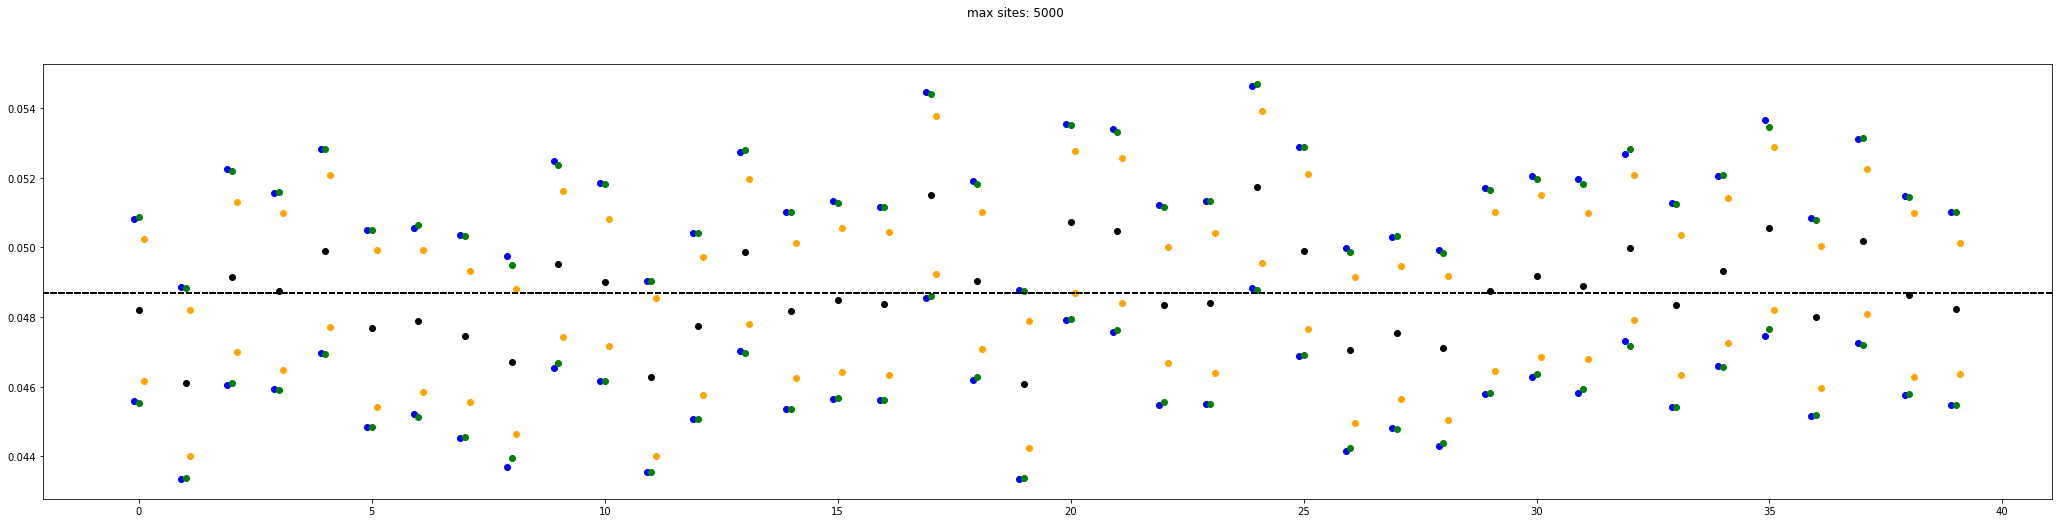

In [33]:
nrep = 40
ci_interval = 0.95
max_sites = 5000

pop_fst = get_fst_general(pop_ts, np.arange(pop_ts.num_sites), pop_ts.samples(0), pop_ts.samples(1))
print(f"pop: {pop_fst:0.5f}")

fig, ax = plt.subplots(figsize=(36,8))
for x in range(nrep):
    obs_ts = observe(ts=pop_ts, num_inds=50, max_sites=max_sites, num_pop=2)
    obs_fst = get_fst_general(obs_ts, np.arange(obs_ts.num_sites), obs_ts.samples(0), obs_ts.samples(1))
    print(f"obs: {obs_fst:0.5f}")
    # resample sites
    bt_site_vals = bootstrap_sites_fst(obs_ts)
    jk_site_vals = jackknife_sites_fst(obs_ts)
    # resamples inds
    jk_ind_vals = jackknife_inds_fst(obs_ts)
    
    # calculate cis
    bt_site_ci = bt_standard(bt_site_vals, ci_interval, obs_fst)
    jk_site_ci = jk_delete_one(jk_site_vals, ci_interval, obs_fst)
    jk_ind_ci = jk_delete_one(jk_ind_vals, ci_interval, obs_fst)
    
    ax.axhline(y=pop_fst, c = 'black', ls = '--')
    ax.scatter(x, obs_fst, c = 'black')
    ax.scatter([x-.1]*2, bt_site_ci, c='blue', label = 'bt_site')
    ax.scatter([x]*2, jk_site_ci, c='green', label = 'jk_site')
    ax.scatter([x+.1]*2, jk_ind_ci, c='orange', label = 'jk_ind')
plt.suptitle(f'max sites: {max_sites}')

pop: 0.04870
obs: 0.04835
obs: 0.04957
obs: 0.04738
obs: 0.04865
obs: 0.04902
obs: 0.04806
obs: 0.04837
obs: 0.04905
obs: 0.04755
obs: 0.04915
obs: 0.04704
obs: 0.04774
obs: 0.04979
obs: 0.04881
obs: 0.04872
obs: 0.04813
obs: 0.04886
obs: 0.04915
obs: 0.04921
obs: 0.04882
obs: 0.04868
obs: 0.04915
obs: 0.04872
obs: 0.05003
obs: 0.04845
obs: 0.04764
obs: 0.04835
obs: 0.04832
obs: 0.04882
obs: 0.04778
obs: 0.05006
obs: 0.04861
obs: 0.04833
obs: 0.04742
obs: 0.04928
obs: 0.04775
obs: 0.04891
obs: 0.04872
obs: 0.04766
obs: 0.04814


Text(0.5, 0.98, 'max sites: 50000')

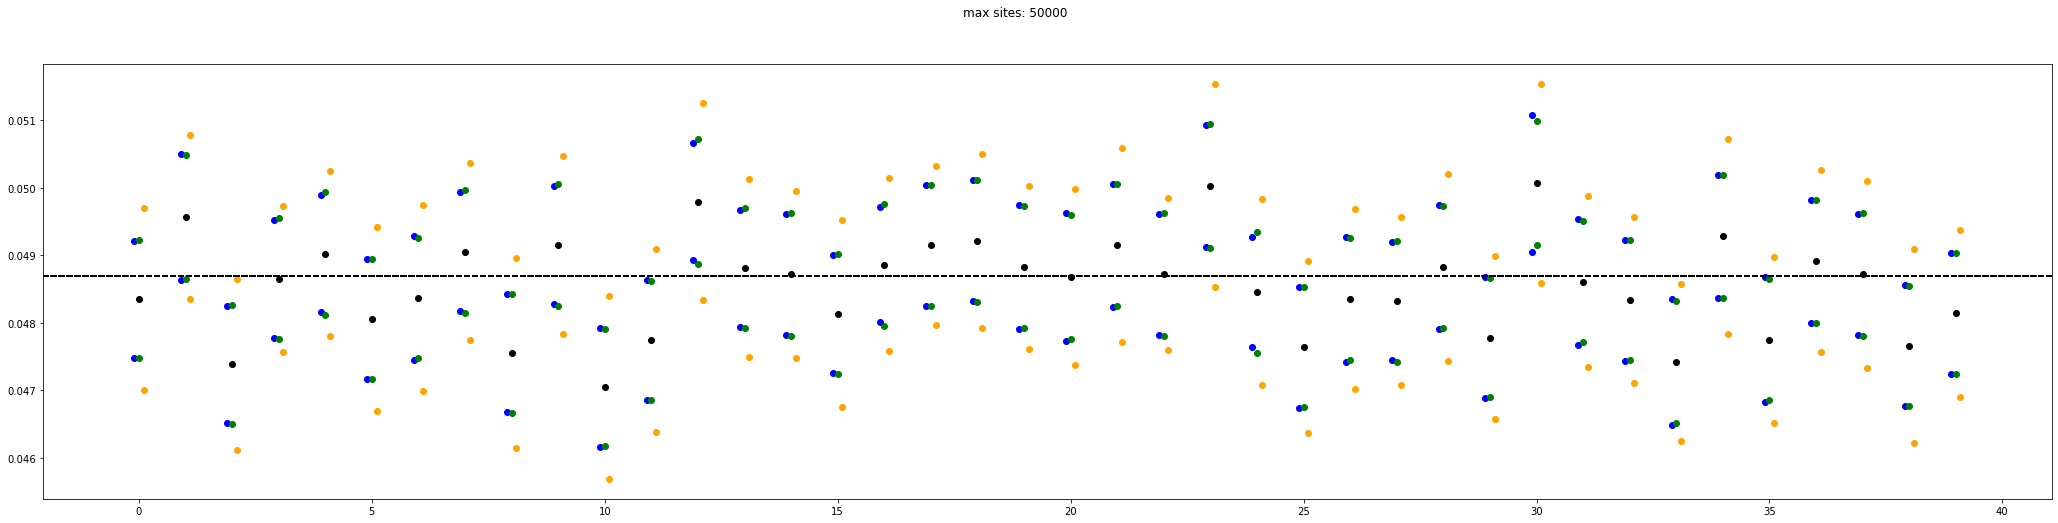

In [34]:
nrep = 40
ci_interval = 0.95
max_sites = 50000

pop_fst = get_fst_general(pop_ts, np.arange(pop_ts.num_sites), pop_ts.samples(0), pop_ts.samples(1))
print(f"pop: {pop_fst:0.5f}")

fig, ax = plt.subplots(figsize=(36,8))
for x in range(nrep):
    obs_ts = observe(ts=pop_ts, num_inds=50, max_sites=max_sites, num_pop=2)
    obs_fst = get_fst_general(obs_ts, np.arange(obs_ts.num_sites), obs_ts.samples(0), obs_ts.samples(1))
    print(f"obs: {obs_fst:0.5f}")
    # resample sites
    bt_site_vals = bootstrap_sites_fst(obs_ts)
    jk_site_vals = jackknife_sites_fst(obs_ts)
    # resamples inds
    jk_ind_vals = jackknife_inds_fst(obs_ts)
    
    # calculate cis
    bt_site_ci = bt_standard(bt_site_vals, ci_interval, obs_fst)
    jk_site_ci = jk_delete_one(jk_site_vals, ci_interval, obs_fst)
    jk_ind_ci = jk_delete_one(jk_ind_vals, ci_interval, obs_fst)
    
    ax.axhline(y=pop_fst, c = 'black', ls = '--')
    ax.scatter(x, obs_fst, c = 'black')
    ax.scatter([x-.1]*2, bt_site_ci, c='blue', label = 'bt_site')
    ax.scatter([x]*2, jk_site_ci, c='green', label = 'jk_site')
    ax.scatter([x+.1]*2, jk_ind_ci, c='orange', label = 'jk_ind')
plt.suptitle(f'max sites: {max_sites}')